# C Parameter

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from matplotlib import pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
# load the data
df = pd.read_csv(data)

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# replace column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# replace categorical column values to lowercase and replace spaces with underscores
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [5]:
# drop column customerid
del df['customerid']

In [6]:
# convert totalcharges to numeric, coerce errors to NaN
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
# fill NaN with 0
df.totalcharges = df.totalcharges.fillna(0)

In [7]:
# target value is churn column
# change churn to number, 1 if yes, 0 if no
df.churn = (df.churn == 'yes').astype(int)

In [8]:
# split data into train, val and test 60%, 20%, 20%

# test size 20%
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# val size 20%
# df_full_train = 80%
# val = 20% / 80% = 0.25
# train is remaining 60%
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [9]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
# separate target value and remove it from features
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [16]:
categorical_columns = [
'gender',
'partner',
'dependents',
'phoneservice',
'multiplelines',
'internetservice',
'onlinesecurity',
'onlinebackup',
'deviceprotection',
'techsupport',
'streamingtv',
'streamingmovies',
'contract',
'paperlessbilling',
'paymentmethod'
]

numeric_columns = [
    'seniorcitizen',
    'tenure',
    'monthlycharges',
    'totalcharges'
]



In [17]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

print(len(train_dict))
print(len(val_dict))

4225
1409


In [18]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [20]:
# convert to ohe for each column with type categorical
train_enc = dv.transform(train_dict)
val_enc = dv.transform(val_dict)

#print(train_enc)

# the final number of columns is: 9
print("shape : ", train_enc.shape)
print("shape : ", val_enc.shape)

shape :  (4225, 45)
shape :  (1409, 45)


In [ ]:
# iterate over different values of C
c_values = [1e-5, 1e-4, 0.001, 0.01, 0.1, 1, 10, 100, 500]
coef_table = []
    
for c_value in c_values:
    print("C =", c_value)
    model_lr = LogisticRegression(C=c_value, max_iter=1000, solver='liblinear')
    model_lr.fit(train_enc, y_train)
    pred = model_lr.predict(val_enc)
    print("Accuracy:", (y_val == pred).astype(int).mean())

    # get coefficients
    coef = model_lr.coef_.ravel()   # flatten
    coef_table.append(coef)
    print("First 5 coefficients:", np.round(coef[:5], 4))  # show sample
    
    print() 


# convert to df
coef_df = pd.DataFrame(coef_table, index=[f"C={c}" for c in c])



C = 1e-05
Accuracy: 0.7622427253371186
First 5 coefficients: [ 0.0002 -0.001  -0.0011 -0.0007 -0.0012]

C = 0.0001
Accuracy: 0.7799858055358411
First 5 coefficients: [ 0.0031 -0.006  -0.0066 -0.0027 -0.0068]

C = 0.001
Accuracy: 0.7899219304471257
First 5 coefficients: [ 0.043  -0.037  -0.0481 -0.0044 -0.0377]

C = 0.01
Accuracy: 0.7984386089425124
First 5 coefficients: [ 0.2527 -0.114  -0.2282 -0.0042 -0.0854]

C = 0.1
Accuracy: 0.8048261178140526
First 5 coefficients: [ 0.4438 -0.1641 -0.3874 -0.0066 -0.1011]

C = 1
Accuracy: 0.8055358410220014
First 5 coefficients: [ 0.6065 -0.0577 -0.6708 -0.0279 -0.094 ]

C = 10
Accuracy: 0.8055358410220014
First 5 coefficients: [ 0.6272 -0.0422 -0.703  -0.0288 -0.0892]

C = 100
Accuracy: 0.8041163946061036
First 5 coefficients: [ 0.617  -0.0557 -0.6838 -0.0287 -0.0938]

C = 500
Accuracy: 0.8041163946061036
First 5 coefficients: [ 0.6171 -0.0557 -0.6839 -0.0287 -0.0938]



In [36]:
coef_df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
C=1e-05,0.000219,-0.000978,-0.001085,-0.000653,-0.001192,0.000190,-0.001857,-0.000178,-0.000796,-0.001049,...,-0.001857,0.000535,-0.000430,-0.001857,0.000442,0.000920,-0.001857,-0.000908,-0.041890,0.000012
C=0.0001,0.003067,-0.006015,-0.006566,-0.002705,-0.006809,0.003205,-0.010320,-0.002400,-0.003835,-0.005679,...,-0.010320,0.002644,-0.001026,-0.010320,0.001831,0.008808,-0.010320,-0.008003,-0.088371,0.000478
C=0.001,0.042991,-0.037018,-0.048124,-0.004435,-0.037716,0.025135,-0.046350,-0.020937,-0.016112,-0.026039,...,-0.046350,0.014247,-0.003440,-0.046350,0.007639,0.064860,-0.046350,-0.060661,-0.095711,0.000558
C=0.01,0.252731,-0.114048,-0.228235,-0.004199,-0.085352,0.057340,-0.084888,-0.062003,-0.031830,-0.057721,...,-0.084888,0.054901,-0.031405,-0.084888,0.026742,0.167644,-0.084888,-0.172307,-0.076881,0.000420
C=0.1,0.443798,-0.164086,-0.387445,-0.006612,-0.101121,0.068605,-0.090319,-0.086019,-0.035831,-0.071903,...,-0.090319,0.086413,-0.059145,-0.090319,0.041730,0.218484,-0.090319,-0.235898,-0.069622,0.000382
C=1,0.606521,-0.057703,-0.670753,-0.027889,-0.094045,0.052120,-0.102682,-0.071373,-0.042000,-0.079934,...,-0.102682,0.081759,-0.064490,-0.102682,0.045238,0.170075,-0.102682,-0.189328,-0.066871,0.000376
C=10,0.627150,-0.042191,-0.702983,-0.028843,-0.089181,0.056833,-0.105180,-0.069676,-0.038564,-0.079460,...,-0.105180,0.087185,-0.061713,-0.105180,0.048869,0.177206,-0.105180,-0.190050,-0.068030,0.000394
C=100,0.616992,-0.055708,-0.683818,-0.028693,-0.093841,0.051757,-0.102964,-0.071327,-0.042123,-0.080410,...,-0.102964,0.082360,-0.065220,-0.102964,0.045651,0.169134,-0.102964,-0.188703,-0.066702,0.000376
C=500,0.617079,-0.055689,-0.683928,-0.028699,-0.093839,0.051755,-0.102966,-0.071327,-0.042124,-0.080414,...,-0.102966,0.082365,-0.065226,-0.102966,0.045654,0.169126,-0.102966,-0.188698,-0.066700,0.000376


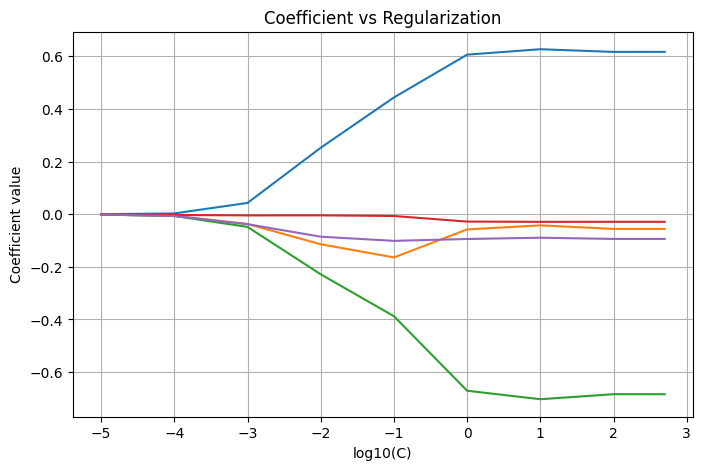

In [42]:
# plot top 5 coefficients vs C values

plt.figure(figsize=(8,5))
for i in range(5):
    plt.plot(np.log10(c_values), coef_df.iloc[:, i], label=i)
plt.xlabel('log10(C)')
plt.ylabel('Coefficient value')
plt.title('Coefficient vs Regularization')
plt.grid(True)
plt.show()


Small C make model more general, but if C too small can cause underfit. Large C make model more specific and can become overfitting. 
Small C make coefficient parameter is small, and will go larger when C increase.

Example analogy of C is like camera focus setting:
* Using large C is likely using high focus camera, everything look detail and sharp. Like taking photo of an insect in macro mode. 
* Otherwise, using small C likely camera focus to big scene, not detail and less sharp. Like taking photo of mountain, background and detail become blurry. 

There's no correct value of C. It must try differenct C value and do evaluation to match with our need.